<!DOCTYPE html>
<html>
<body>
    <h1>
        INFO About Titanic Database
    </h1>
    <h3>The Titanic database is a classic dataset used in machine learning and data analysis. It contains information about the passengers on the Titanic,                 including their age, gender, class, fare, and whether or not they survived thesinking of the ship. Here is a brief explanation of each field:
    </h3>
    <p><b>This is a paragraph of text.</b></p>
    <ul>
        <li>
            <b>Survived</b>: This field indicates whether or not the passenger survived the sinking of the Titanic. A value of 1 indicates that the passenger survived, while a value of 0 indicates that they did not.
        </li>
        <li>
            <b>Pclass</b>: This field indicates the class of the passenger. A value of 1 indicates the first class, a value of 2 indicates the second class, and a value of 3 indicates the third class.
        </li>
        <li>
            <b>Name</b>: This field contains the name of the passenger.
        </li>
        <li>
           <b>Sex</b>: This field indicates the gender of the passenger. A value of "male" indicates that the passenger is male,while a value of "female" indicates that the passenger is female.
        </li>
        <li>
            <b>Age</b>: This field contains the age of the passenger.
        </li>
        <li>
            <b>SibSp</b>: This field indicates the number of siblings and spouses aboard the Titanic.
        </li>
        <li>
            <b>Parch</b>: This field indicates the number of parents and children aboard the Titanic.
        </li>
        <li>
            <b>Ticket</b>: This field contains the ticket number of the passenger.
        </li>
        <li>
            <b>Fare</b>: This field contains the fare paid by the passenger.
        </li>
        <li>
            <b>Cabin</b>: This field contains the cabin number of the passenger.
        </li>
        <li>
            <b>Embarked</b>: This field indicates the port where the passenger boarded the Titanic. A value of "C" indicate thatthe passenger boarded in the                                    Cherbourg, a value of "Q" indicates that the passenger boarded in Queenstown,and avalue of "S" indicates that the passenger boarded
                             in Southampton.
        </li>
    </ul>
</body>
</html>


# Importing Libraries

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [33]:
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

### Lowercase Fields

In [35]:
titanic.columns = titanic.columns.str.lower()

### Find Duplicated Values

In [36]:
x1 = titanic.duplicated().sum()
print(f"titanic: {x1}")

titanic: 0


### Fill Missing Values


In [37]:
titanic["age"] =titanic["age"].fillna(titanic["age"].mean())

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Encoding

In [39]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [40]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [41]:
sex = pd.get_dummies(titanic['sex'],drop_first=True)
emb =pd.get_dummies(titanic['embarked'])

In [42]:
titanic=pd.concat([titanic,sex,emb],axis=1)

In [43]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


### Drop Missing Values

<Axes: >

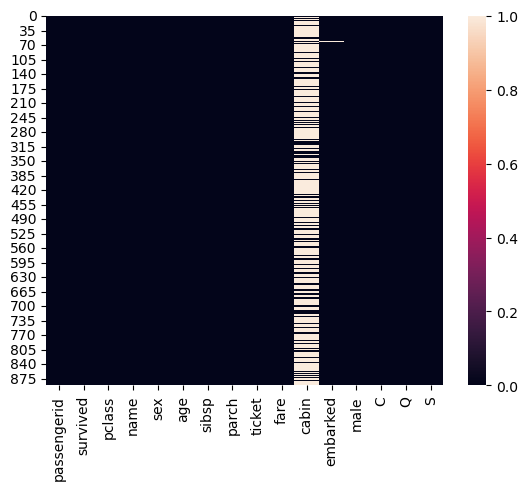

In [44]:
sns.heatmap(titanic.isna())

In [45]:
titanic = titanic.drop(["cabin","name","ticket","sex","embarked"],axis=1)

### Rename

In [46]:
titanic.rename(columns={"male":"sex"},inplace=True)

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   sex          891 non-null    uint8  
 8   C            891 non-null    uint8  
 9   Q            891 non-null    uint8  
 10  S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 52.3 KB


# EDA (Exploratoray Data Analysis)

In [48]:
titanic.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare,sex,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


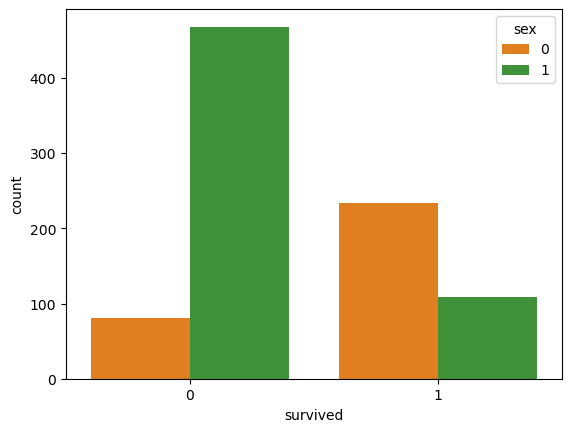

In [49]:
sns.countplot(data=titanic,x="survived",palette="Paired_r",hue="sex")
plt.show()

<Axes: >

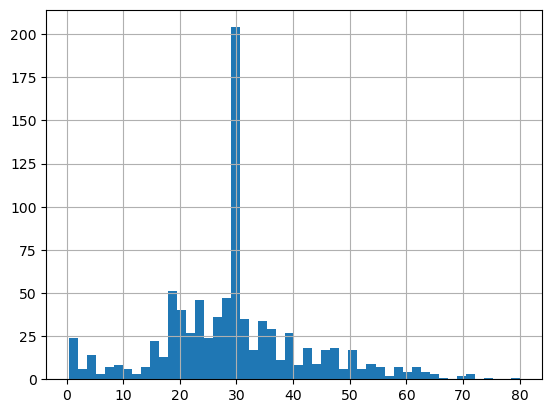

In [50]:
titanic['age'].hist(bins=50)

<Axes: >

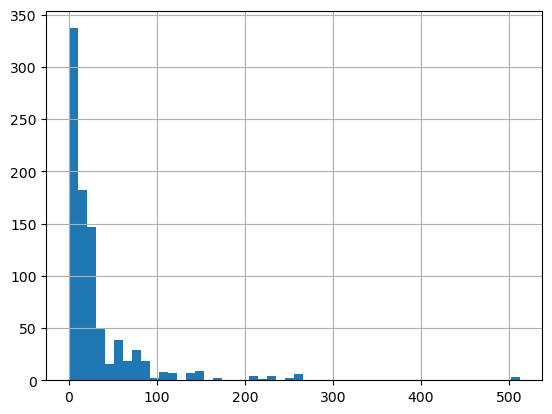

In [51]:
titanic["fare"].hist(bins=50)

## Buliding Model

### Train & Test Data

In [52]:
X = titanic.drop("survived",axis =1)
y = titanic["survived"]

#### Importing Sikit Learn

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.469, random_state=42)

### Model Training & Predicting

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(max_iter=6000)

In [57]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=6000)

In [58]:
yPredition = model.predict(X_test)

In [59]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

### Model Evalution

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,yPredition))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       248
           1       0.78      0.73      0.75       170

    accuracy                           0.80       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.80      0.80      0.80       418



In [62]:
output = pd.DataFrame({'PassengerId': X_test.passengerid, 'Survived': yPredition})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
